### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("pastel")

In [2]:
df_emigranti_definitivi_sexe_judete_ani = pd.read_csv("data/emigranti_definitivi_sexe_judete_ani.csv")
df_emigranti_definitivi_varsta_judete = pd.read_csv("data/emigranti_definitivi_varsta_judete.csv")
df_emigranti_definitivi_tara_destinatie = pd.read_csv("data/emigranti_definitivi_tara_destinatie.csv")
df_emigranti_definitivi_regiuni = pd.read_csv("data/emigranti_definitivi_regiuni.csv")

### Exploratory Data Analysis

##### Permanent emigrants

In [3]:
df_emigranti_definitivi_sexe_judete_ani.drop(' UM: Numar persoane', axis=1, inplace=True)
df_emigranti_definitivi_sexe_judete_ani = df_emigranti_definitivi_sexe_judete_ani.rename(columns={'Sexe': 'Sex', 
                                                                                                  ' Macroregiuni  regiuni de dezvoltare si judete': 'Region', 
                                                                                                  ' Ani': 'Year',
                                                                                                  ' Valoare': 'Value'})

df_emigranti_definitivi_sexe_judete_ani['Year'] = df_emigranti_definitivi_sexe_judete_ani['Year'].apply(lambda x: int(x.split(' ')[2]))  # Extract year as integer

In [4]:
# Group by Year, Region, and Sex, and sum the values
temp_df = df_emigranti_definitivi_sexe_judete_ani.groupby(['Year', 'Region', 'Sex']).sum().reset_index()

# Pivot the table so we can easily subtract male from female migration
pivot_df = temp_df.pivot_table(values='Value', index=['Year', 'Region'], columns='Sex')

# Sum of 'Masculin' and 'Feminin' columns will give the total masculine and feminine population emigrated.
total_masculine_emigrated = pivot_df['Masculin'].sum()
total_feminine_emigrated = pivot_df['Feminin'].sum()

print(f"Total masculine population permanently emigrated: {total_masculine_emigrated}")
print(f"Total feminine population permanently emigrated: {total_feminine_emigrated}")

Total masculine population permanently emigrated: 275730
Total feminine population permanently emigrated: 335481


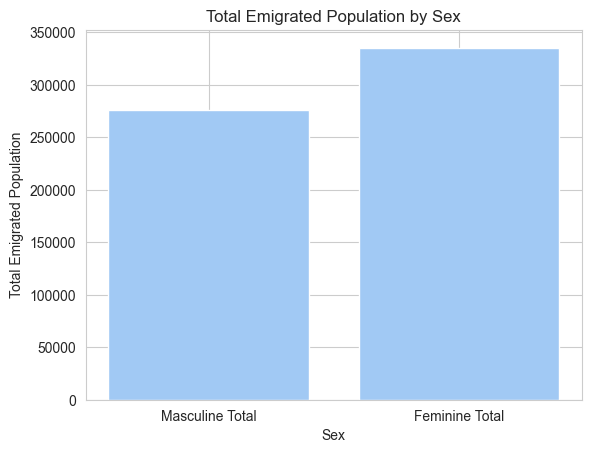

In [5]:
# Plotting the bar plot
labels = ['Masculine Total', 'Feminine Total']
values = [total_masculine_emigrated, total_feminine_emigrated]

plt.bar(labels, values)
plt.xlabel('Sex')
plt.ylabel('Total Emigrated Population')
plt.title('Total Emigrated Population by Sex')
plt.show()

We can conclude that female emigration exceeded male migration slightly.

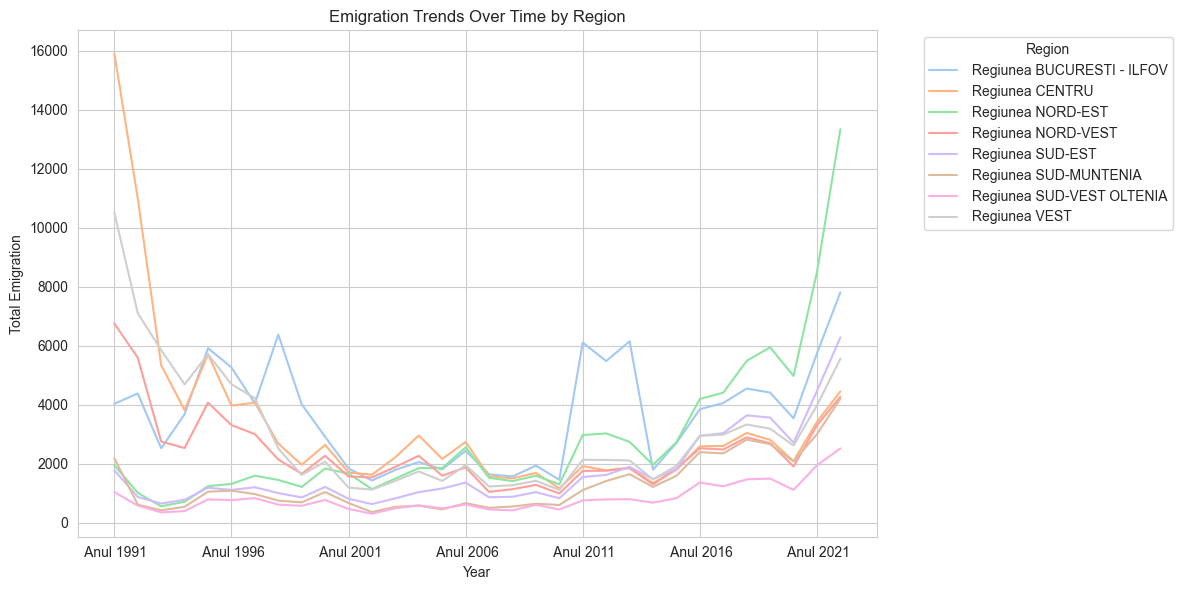

In [6]:
# Group the data by Year and Region, and calculate the sum of 'Value'
grouped_df = df_emigranti_definitivi_regiuni.groupby([' Ani', ' Macroregiuni  regiuni de dezvoltare si judete'])[' Valoare'].sum().reset_index()

# Pivot the data to have Regions as columns and Years as the index
pivot_df = grouped_df.pivot(index=' Ani', columns=' Macroregiuni  regiuni de dezvoltare si judete', values=' Valoare')

# Plot the data
pivot_df.plot(kind='line', figsize=(12, 6))  # Adjust the width and height as needed
plt.title('Emigration Trends Over Time by Region')
plt.ylabel('Total Emigration')
plt.xlabel('Year')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

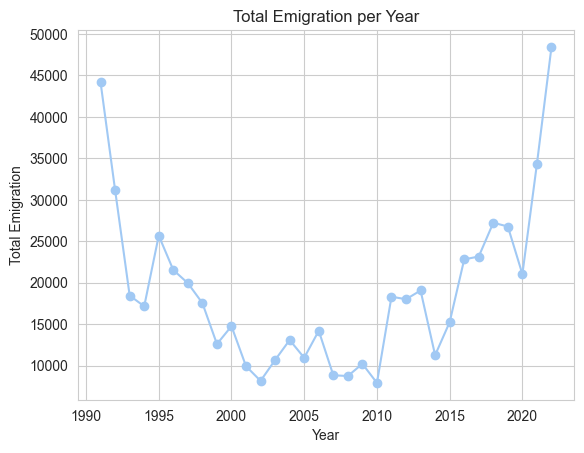

In [7]:
yearly_totals = df_emigranti_definitivi_sexe_judete_ani.groupby('Year')['Value'].sum()

# Plotting the line chart
plt.plot(yearly_totals.index, yearly_totals.values, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Emigration')
plt.title('Total Emigration per Year')
plt.grid(True)
plt.show()

- Post-Communist Transition (1991-1999): This period reflects the aftermath of the fall of the communist regime in Romania. Emigration was significant in the early years, particularly in 1991, as the country underwent political and economic uncertainties during the transition to democracy. Emigration numbers gradually decreased over the following years but remained relatively high compared to pre-transition levels.
- Economic Challenges and EU Accession (2000-2010): This period encompasses a phase of economic challenges and Romania's accession to the European Union (EU) in 2007. Emigration during this time remained relatively stable, with fluctuations but no clear upward or downward trend. The economic difficulties, including high unemployment rates and limited job opportunities, may have driven some individuals to seek better prospects abroad.
- Post-Financial Crisis and EU Mobility (2011-2022): This period reflects the impact of the global financial crisis that began in 2008 and Romania's increased integration within the EU. Emigration numbers started to rise noticeably in 2011 and continued to increase, reaching a peak in 2022. The financial crisis and subsequent economic challenges in Romania, along with improved mobility within the EU, likely contributed to the higher emigration rates during this phase.

##### Permanent emigrants by ages

In [8]:
df_emigranti_definitivi_varsta_judete.drop(' UM: Numar persoane', axis=1, inplace=True)
df_emigranti_definitivi_varsta_judete = df_emigranti_definitivi_varsta_judete.rename(columns={'Varste si grupe de varsta': 'Ages', 
                                                                                              ' Macroregiuni  regiuni de dezvoltare si judete': 'Region', 
                                                                                              ' Ani': 'Year',
                                                                                              ' Valoare': 'Value'})

df_emigranti_definitivi_varsta_judete['Year'] = df_emigranti_definitivi_varsta_judete['Year'].apply(lambda x: int(x.split(' ')[2]))  # Extract year as integer

In [9]:
# Create a dictionary to map the old age groups to the new ones
age_mapping = {
    '0- 4 ani': '0-14',
    '5- 9 ani': '0-14',
    '10-14 ani': '0-14',
    '15-19 ani': '15-24',
    '20-24 ani': '15-24',
    '25-29 ani': '25-64',
    '30-34 ani': '25-64',
    '35-39 ani': '25-64',
    '40-44 ani': '25-64',
    '45-49 ani': '25-64',
    '50-54 ani': '25-64',
    '55-59 ani': '25-64',
    '60-64 ani': '25-64',
    '65-69 ani': '65+',
    '70-74 ani': '65+',
    '75-79 ani': '65+',
    '80-84 ani': '65+',
    '85 ani si peste': '65+'
}

# Remap the 'Ages' column using the age_mapping dictionary
df_emigranti_definitivi_varsta_judete['Ages'] = df_emigranti_definitivi_varsta_judete['Ages'].map(age_mapping)

In [10]:
# Create a new dataframe grouped by Year and Region and apply idxmax() to the Value column
most_popular_age_group  = df_emigranti_definitivi_varsta_judete.groupby(['Year', 'Region'])['Value'].idxmax()
# Use the indices to get the corresponding rows from the original dataframe
most_popular_age_group_df = df_emigranti_definitivi_varsta_judete.loc[most_popular_age_group].reset_index(drop=True)
# Calculate the value counts
age_counts = most_popular_age_group_df['Ages'].value_counts()

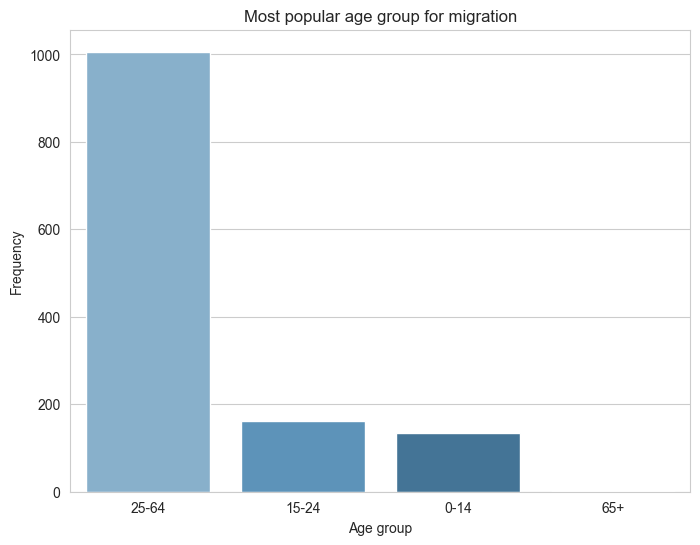

In [11]:
# Convert the index and values to a DataFrame
age_counts_df = age_counts.reset_index()

# Rename the columns for clarity
age_counts_df.columns = ['Ages', 'Count']

# Create the bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Ages', y='Count', data=age_counts_df, palette="Blues_d")
plt.title('Most popular age group for migration')
plt.xlabel('Age group')
plt.ylabel('Frequency')
plt.show()

The data shows the most frequently occurring age group with the highest migration count in Romania for each region and year:

- '25-64' appeared most frequently (1006 times), indicating that working-age adults are the most mobile group, likely due to job or educational opportunities.
- '15-24' is the next most common (161 times), suggesting young adults and students also migrate often, likely for similar reasons.
- '0-14' appeared 134 times, suggesting some level of family migration.
- The '65+' group, typically retirees, was least common (1 time), indicating this age group rarely leads in migration.

So, the majority of migration in Romania is driven by people in their prime working years (25-64 years old).

In [12]:
# Group by Year and Ages, then calculate the sum of the Value column
ids_ages = most_popular_age_group_df.groupby(['Ages', 'Year'])['Value'].sum()
age_sum_per_year_df = ids_ages.reset_index()

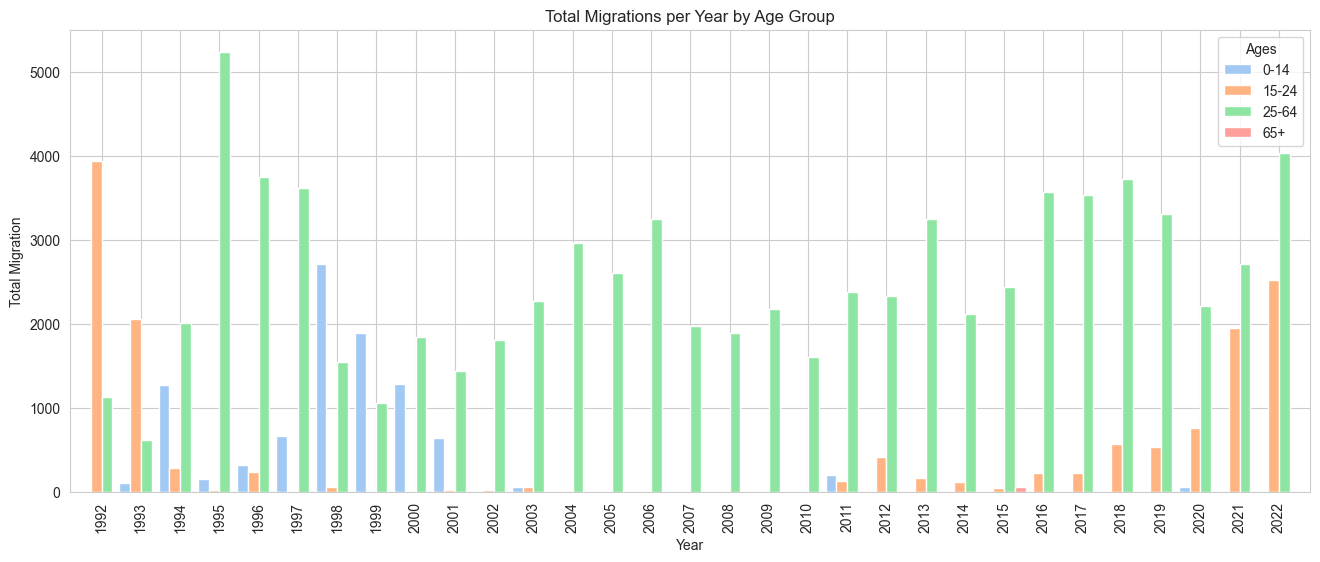

In [13]:
# Pivot the DataFrame to have Years as index, Ages as columns, and Value as cell values
pivot_df = age_sum_per_year_df.pivot(index='Year', columns='Ages', values='Value')

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=False, figsize=(16,6), width=1.1)

plt.title('Total Migrations per Year by Age Group')
plt.xlabel('Year')
plt.ylabel('Total Migration')

plt.show()

The data shows that emigration from Romania varies across different age groups and years. Key historical events and socio-economic conditions have influenced these trends.

In the early to mid-'90s, post the fall of communism, many people, especially within the 15-24 and 25-64 age groups, left Romania due to economic and political instability.

As Romania progressed economically and joined NATO and the EU, the overall emigration slightly decreased, but a considerable number of people, particularly from the 25-64 age group, continued to leave, indicating persistent economic challenges and attraction towards Western Europe.

Notably, the emigration of the 15-24 age group increased in recent years, potentially due to an increasing trend of seeking higher education abroad.

Despite Romania's economic growth, emigration remains relatively high, particularly among the working-age and young populations. Further analysis would offer more precise reasons behind these trends.

#### Permanent emigrants by country of destination

In [14]:
df_emigranti_definitivi_tara_destinatie.drop(' UM: Numar persoane', axis=1, inplace=True)
df_emigranti_definitivi_tara_destinatie = df_emigranti_definitivi_tara_destinatie.rename(columns={'Tari de destinatie ': 'Destination', 
                                                                                                  ' Ani': 'Year',
                                                                                                  ' Valoare': 'Value'})

df_emigranti_definitivi_tara_destinatie['Year'] = df_emigranti_definitivi_tara_destinatie['Year'].apply(lambda x: int(x.split(' ')[2]))

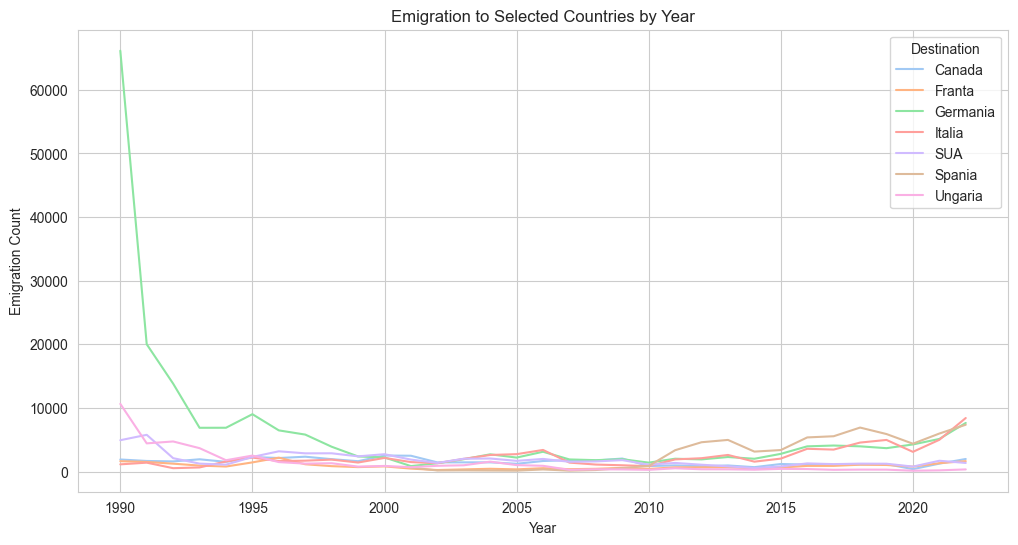

In [15]:
# List of countries of interest
countries = ['SUA', 'Germania', 'Franta', 'Italia', 'Spania', 'Ungaria', 'Canada']

# Filter the dataframe for the selected countries
df_filtered = df_emigranti_definitivi_tara_destinatie[df_emigranti_definitivi_tara_destinatie['Destination'].isin(countries)]

# Pivot the DataFrame to have years as index, countries as columns and values as the emigration count
pivot_df = df_filtered.pivot(index='Year', columns='Destination', values='Value')

# Plot the data
pivot_df.plot(kind='line', figsize=(12, 6))

plt.title('Emigration to Selected Countries by Year')
plt.xlabel('Year')
plt.ylabel('Emigration Count')
plt.show()

- Germany and Hungary: The 1990s saw a considerable exodus of ethnic Germans and Hungarians from Romania. This aligns with the socio-political shifts in the aftermath of the fall of the communist regime in 1989. The dissolution of the Soviet bloc led to the restoration of national borders and a newfound freedom of movement. Many ethnic Germans and Hungarians seized this opportunity to move to their countries of ethnic origin, seeking to reconnect with their cultural roots and looking for better socio-economic opportunities.

- Italy, France, and Spain: The migration patterns towards these countries are intertwined and reflect the evolving economic opportunities and migration policies in these countries. In the early 2000s, Italy and Spain became significant destinations for Romanians due to labour demands in these countries, specifically in sectors such as agriculture, construction, and domestic work. Their geographical proximity, the existence of informal networks assisting new migrants, and the relatively relaxed immigration policies (until the late 2000s) made these countries attractive destinations.

- French migration is somewhat different, as France has a long history of Romanian immigration dating back to the 19th century. The trends of emigration to France are more associated with academic and professional opportunities rather than low-skilled labor as in Italy and Spain. However, it's important to note that each of these streams of migration (Germany, Hungary, Italy, Spain, and France) involves a mix of economic migrants, family reunification movements, and students, among others.